# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Load Dataset

In [2]:
df = pd.read_csv('customer_churn_dataset.csv')
df

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54.20,2818.40,Month-to-month,Credit,DSL,No,Yes,1,No
1,2,15,35.28,529.20,Month-to-month,Debit,DSL,No,No,2,No
2,3,72,78.24,5633.28,Month-to-month,Debit,DSL,No,No,0,No
3,4,61,80.24,4894.64,One year,Cash,Fiber,Yes,Yes,0,No
4,5,21,39.38,826.98,Month-to-month,UPI,Fiber,No,No,4,Yes
...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,36,69.51,2502.36,Two year,Cash,DSL,No,Yes,0,Yes
19996,19997,10,59.88,598.80,Month-to-month,UPI,Fiber,Yes,No,1,No
19997,19998,6,42.96,257.76,Month-to-month,Credit,Fiber,No,No,2,No
19998,19999,7,102.85,719.95,Month-to-month,Debit,DSL,Yes,No,2,No


## Exploratory Data Analysis

In [3]:
df.shape

(20000, 11)

In [4]:
df.describe()

,customer_id,tenure,monthly_charges,total_charges,support_calls
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,10000.500000,36.467450,70.010531,2543.979209,1.51255
std,5773.647028,20.773984,28.890239,1882.949804,1.23524
min,1.000000,1.000000,20.000000,20.230000,0.00000
25%,5000.750000,18.000000,45.210000,1045.837500,1.00000
50%,10000.500000,36.000000,70.090000,2096.495000,1.00000
75%,15000.250000,54.000000,95.072500,3690.337500,2.00000
max,20000.000000,72.000000,120.000000,8629.920000,8.00000


In [5]:
df.nunique()

customer_id         20000
tenure                 72
monthly_charges      8639
total_charges       18956
contract                3
payment_method          4
internet_service        2
tech_support            2
online_security         2
support_calls           9
churn                   2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       20000 non-null  int64  
 1   tenure            20000 non-null  int64  
 2   monthly_charges   20000 non-null  float64
 3   total_charges     20000 non-null  float64
 4   contract          20000 non-null  object 
 5   payment_method    20000 non-null  object 
 6   internet_service  17987 non-null  object 
 7   tech_support      20000 non-null  object 
 8   online_security   20000 non-null  object 
 9   support_calls     20000 non-null  int64  
 10  churn             20000 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.7+ MB


In [7]:
df.isna().sum()

customer_id            0
tenure                 0
monthly_charges        0
total_charges          0
contract               0
payment_method         0
internet_service    2013
tech_support           0
online_security        0
support_calls          0
churn                  0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.fillna(0, inplace=True)
df

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54.20,2818.40,Month-to-month,Credit,DSL,No,Yes,1,No
1,2,15,35.28,529.20,Month-to-month,Debit,DSL,No,No,2,No
2,3,72,78.24,5633.28,Month-to-month,Debit,DSL,No,No,0,No
3,4,61,80.24,4894.64,One year,Cash,Fiber,Yes,Yes,0,No
4,5,21,39.38,826.98,Month-to-month,UPI,Fiber,No,No,4,Yes
...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,36,69.51,2502.36,Two year,Cash,DSL,No,Yes,0,Yes
19996,19997,10,59.88,598.80,Month-to-month,UPI,Fiber,Yes,No,1,No
19997,19998,6,42.96,257.76,Month-to-month,Credit,Fiber,No,No,2,No
19998,19999,7,102.85,719.95,Month-to-month,Debit,DSL,Yes,No,2,No


In [10]:
num_cols = ['tenure', 'monthly_charges', 'total_charges', 'support_calls']

cat_cols = ['contract', 'payment_method', 'internet_service', 'tech_support', 'online_security', 'churn']

print(len(num_cols))
print(len(cat_cols))

4
6


## Visualization

### 1. Histogram Of Num_Cols

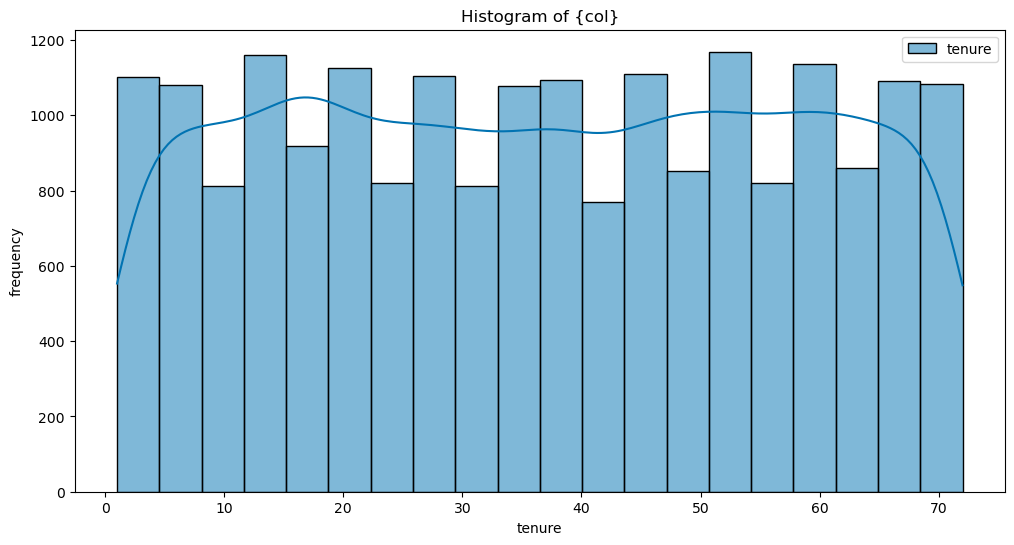

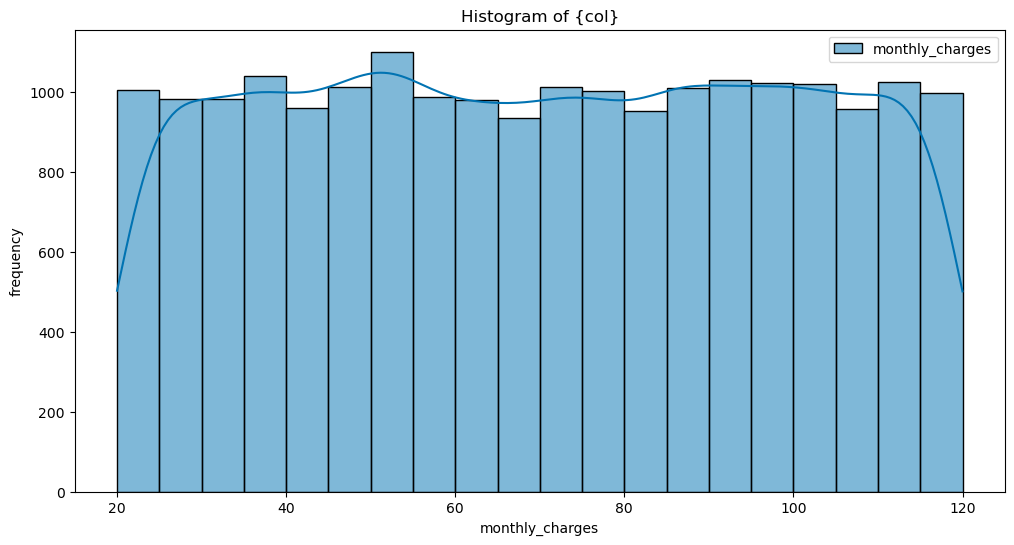

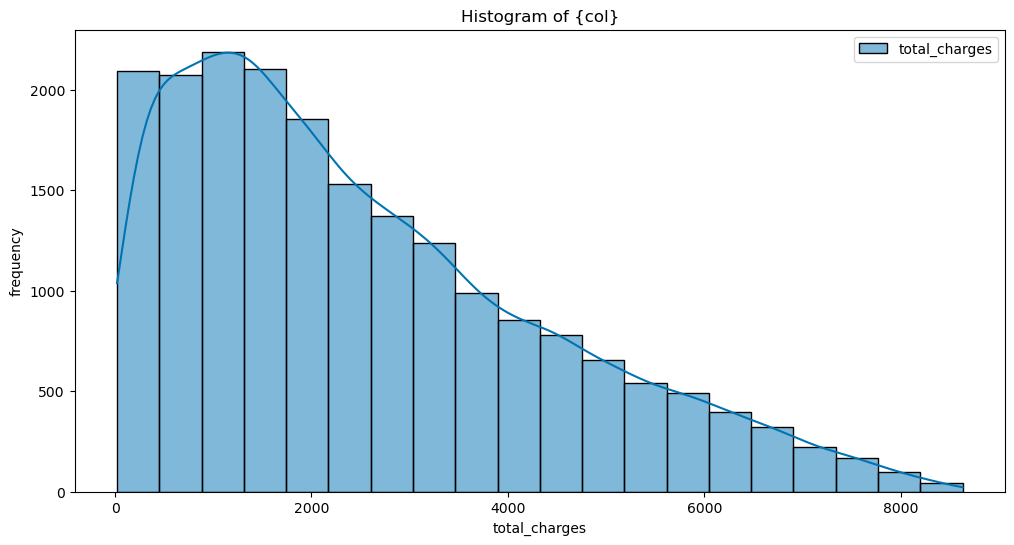

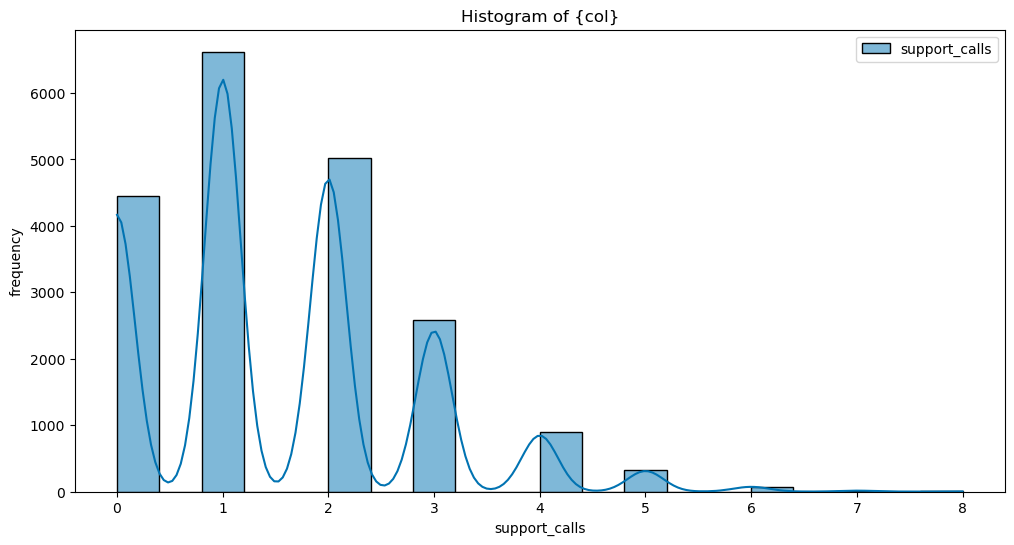

In [14]:
for col in num_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[[col]], kde=True, palette='colorblind', bins=20)
    plt.title('Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.tight_layout
    plt.show()

### 2. Countplot Of Cat_Cols

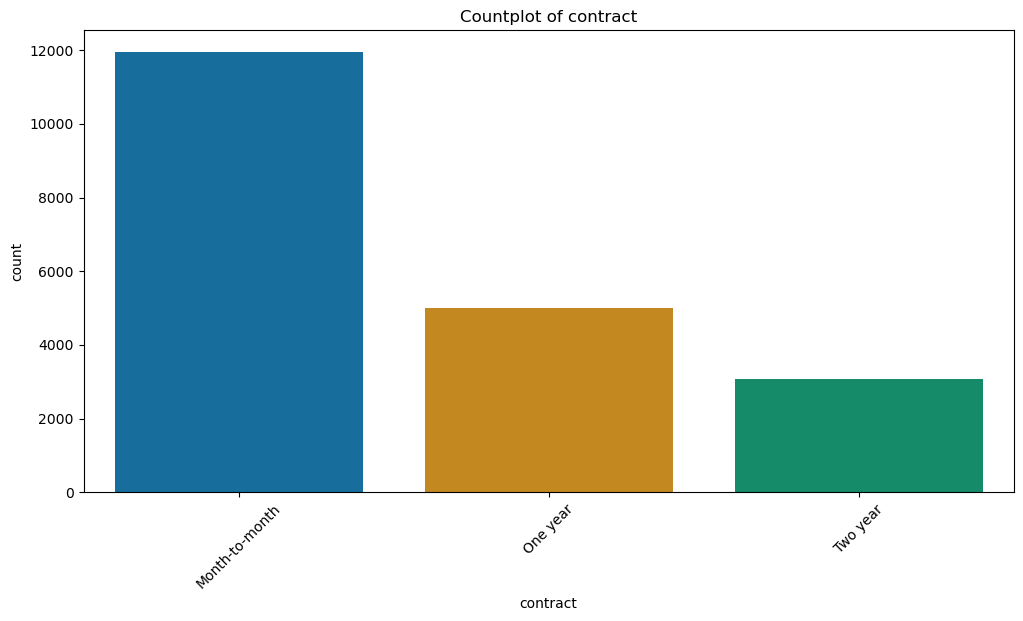

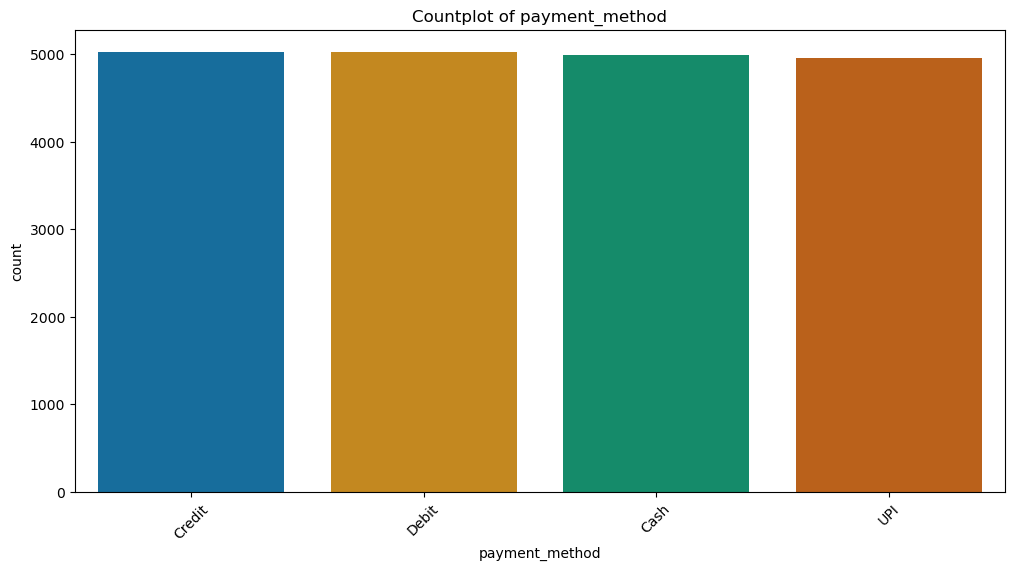

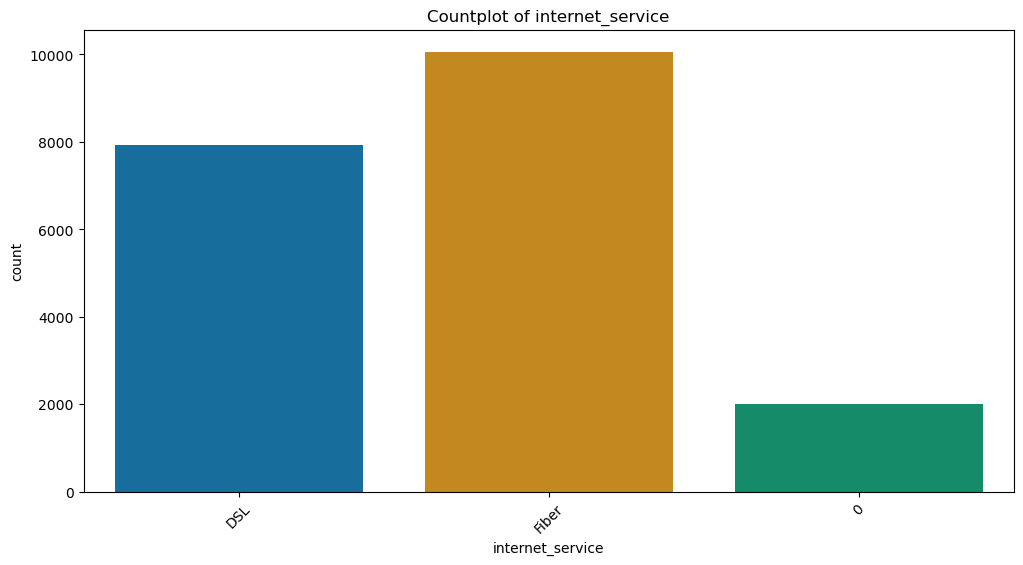

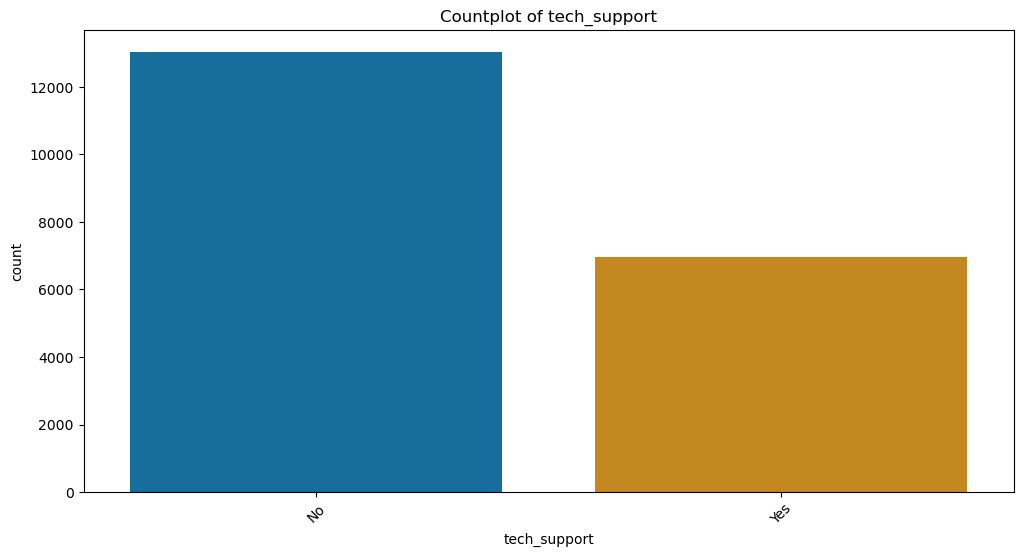

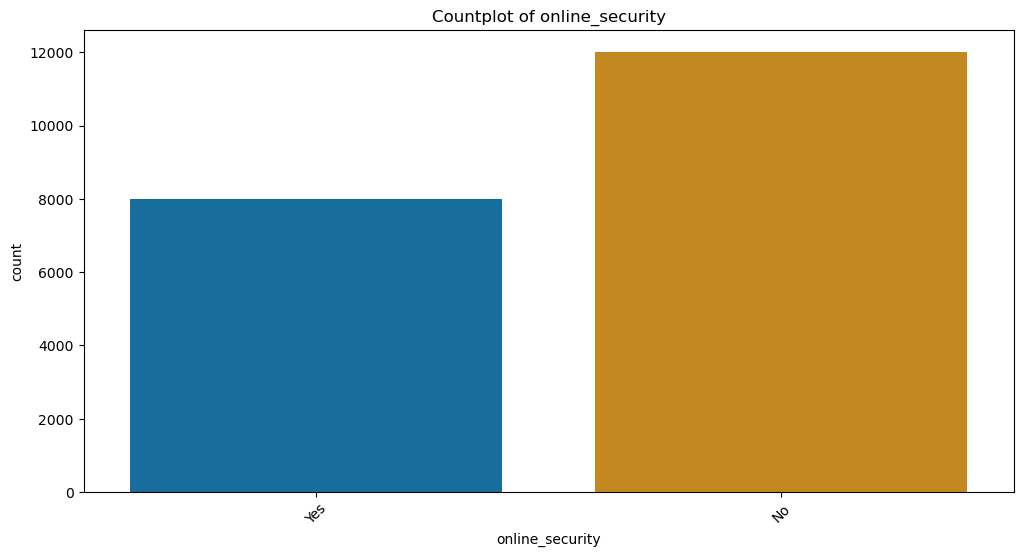

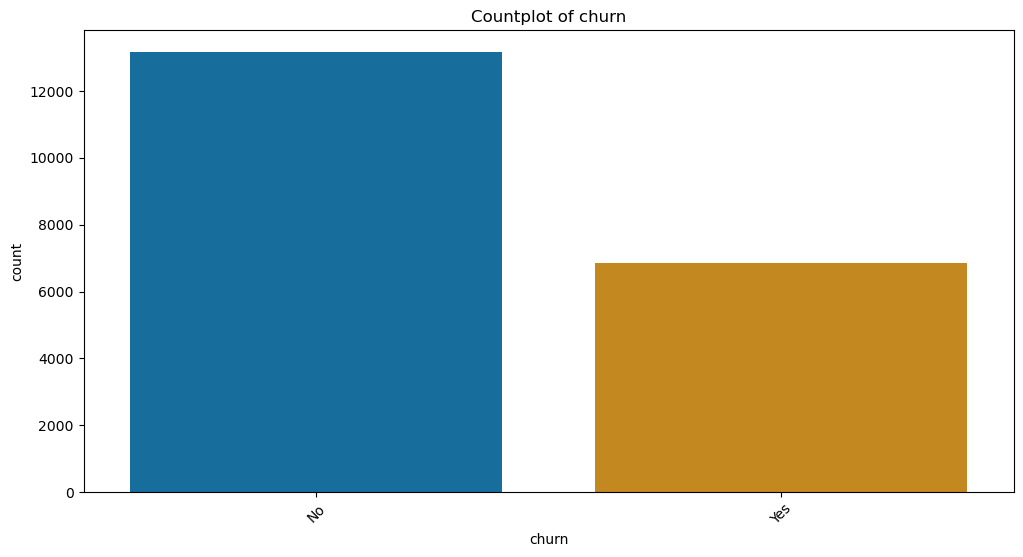

In [13]:
for col in cat_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=col, palette='colorblind')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=45)
    plt.tight_layout
    plt.show()

### 3. Monthly Charges vs Total Charges By Churn

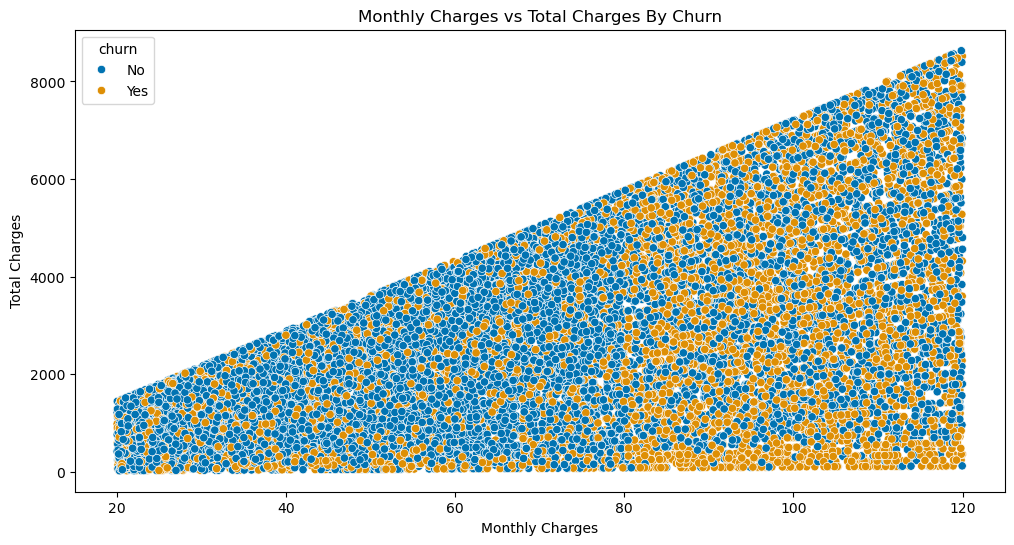

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['monthly_charges'], y=df['total_charges'], hue=df['churn'], palette='colorblind')
plt.title('Monthly Charges vs Total Charges By Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

### 4. Top Customer Total Charges

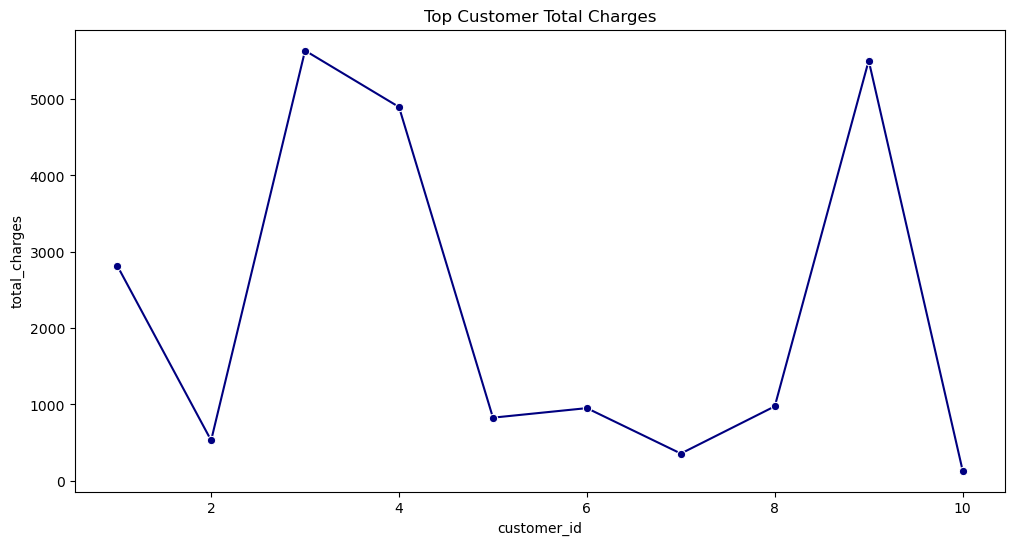

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['customer_id'].head(10), y=df['total_charges'], marker='o', color='#000080')
plt.title('Top Customer Total Charges')
plt.xlabel('customer_id')
plt.ylabel('total_charges')
plt.show()

### 5. Total Charges By Payment Method

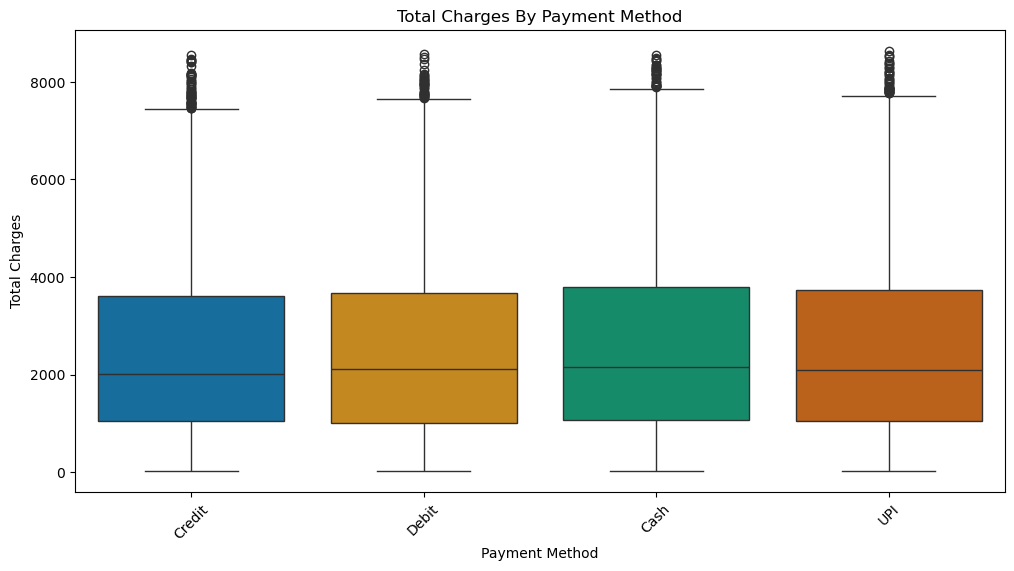

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['payment_method'], y=df['total_charges'], data=df, palette='colorblind')
plt.title('Total Charges By Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Charges')
plt.xticks(rotation=45)
plt.show()

### 6. Online Security By Internet Service

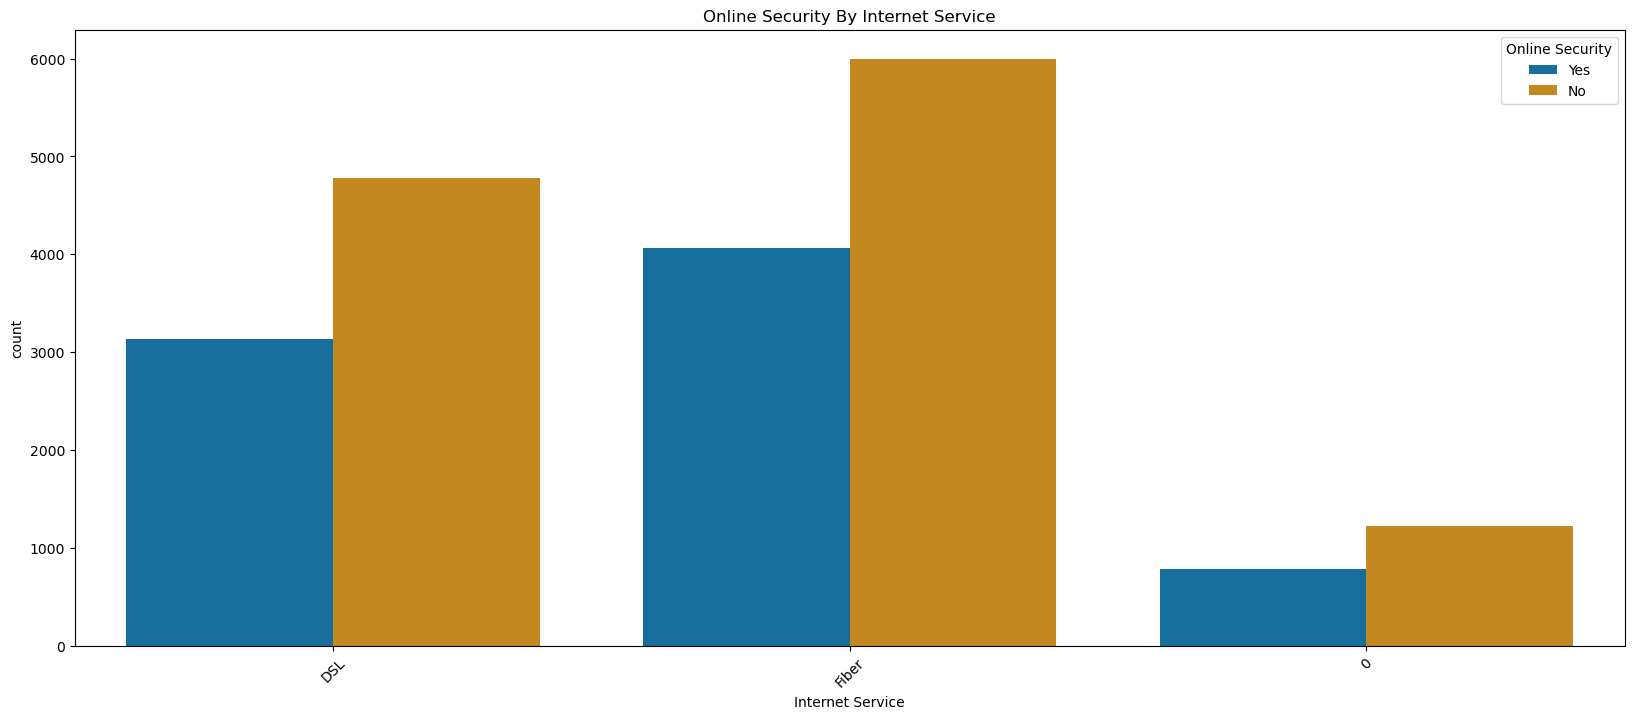

In [26]:
plt.figure(figsize=(20, 8))
sns.countplot(x=df['internet_service'], hue=df['online_security'], palette='colorblind')
plt.title('Online Security By Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.legend(title='Online Security')
plt.show()

### 7. Monthly Charges vs Total Charges

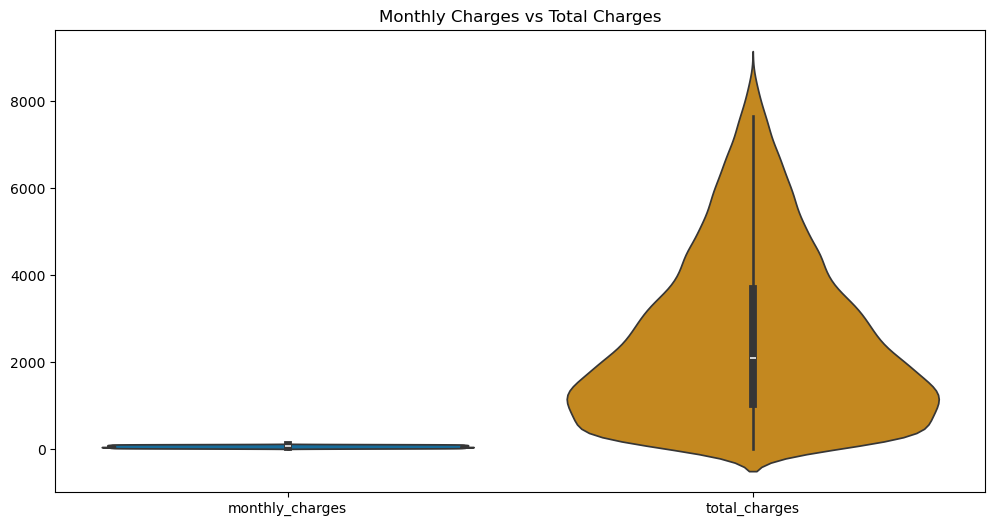

In [28]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[['monthly_charges','total_charges']], palette='colorblind')
plt.title('Monthly Charges vs Total Charges')
plt.show()

### 8. Correlation Map

In [31]:
df['contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [32]:
df['payment_method'].unique()

array(['Credit', 'Debit', 'Cash', 'UPI'], dtype=object)

In [33]:
df['internet_service'].unique()

array(['DSL', 'Fiber', 0], dtype=object)

In [34]:
df['tech_support'].unique()

array(['No', 'Yes'], dtype=object)

In [35]:
df['online_security'].unique()

array(['Yes', 'No'], dtype=object)

In [36]:
df['churn'].unique()

array(['No', 'Yes'], dtype=object)

In [37]:
val = {'contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2,}, 
       'payment_method': {'Credit': 0, 'Debit': 1, 'Cash': 2, 'UPI': 3},
       'tech_support': {'No': 0, 'Yes': 1,},
       'online_security': {'No': 0, 'Yes': 1,},
       'churn': {'No': 0, 'Yes': 1,},
       'internet_service': {'DSL': 1, 'Fiber': 2, '0': 0}
       }
df.replace(val, inplace=True)
df

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54.20,2818.40,0,0,1,0,1,1,0
1,2,15,35.28,529.20,0,1,1,0,0,2,0
2,3,72,78.24,5633.28,0,1,1,0,0,0,0
3,4,61,80.24,4894.64,1,2,2,1,1,0,0
4,5,21,39.38,826.98,0,3,2,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,36,69.51,2502.36,2,2,1,0,1,0,1
19996,19997,10,59.88,598.80,0,3,2,1,0,1,0
19997,19998,6,42.96,257.76,0,0,2,0,0,2,0
19998,19999,7,102.85,719.95,0,1,1,1,0,2,0


In [38]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54.20,2818.40,0,0,1,0,1,1,0
1,2,15,35.28,529.20,0,1,1,0,0,2,0
2,3,72,78.24,5633.28,0,1,1,0,0,0,0
3,4,61,80.24,4894.64,1,2,2,1,1,0,0
4,5,21,39.38,826.98,0,3,2,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,36,69.51,2502.36,2,2,1,0,1,0,1
19996,19997,10,59.88,598.80,0,3,2,1,0,1,0
19997,19998,6,42.96,257.76,0,0,2,0,0,2,0
19998,19999,7,102.85,719.95,0,1,1,1,0,2,0


In [39]:
correlation = numeric_df.corr()

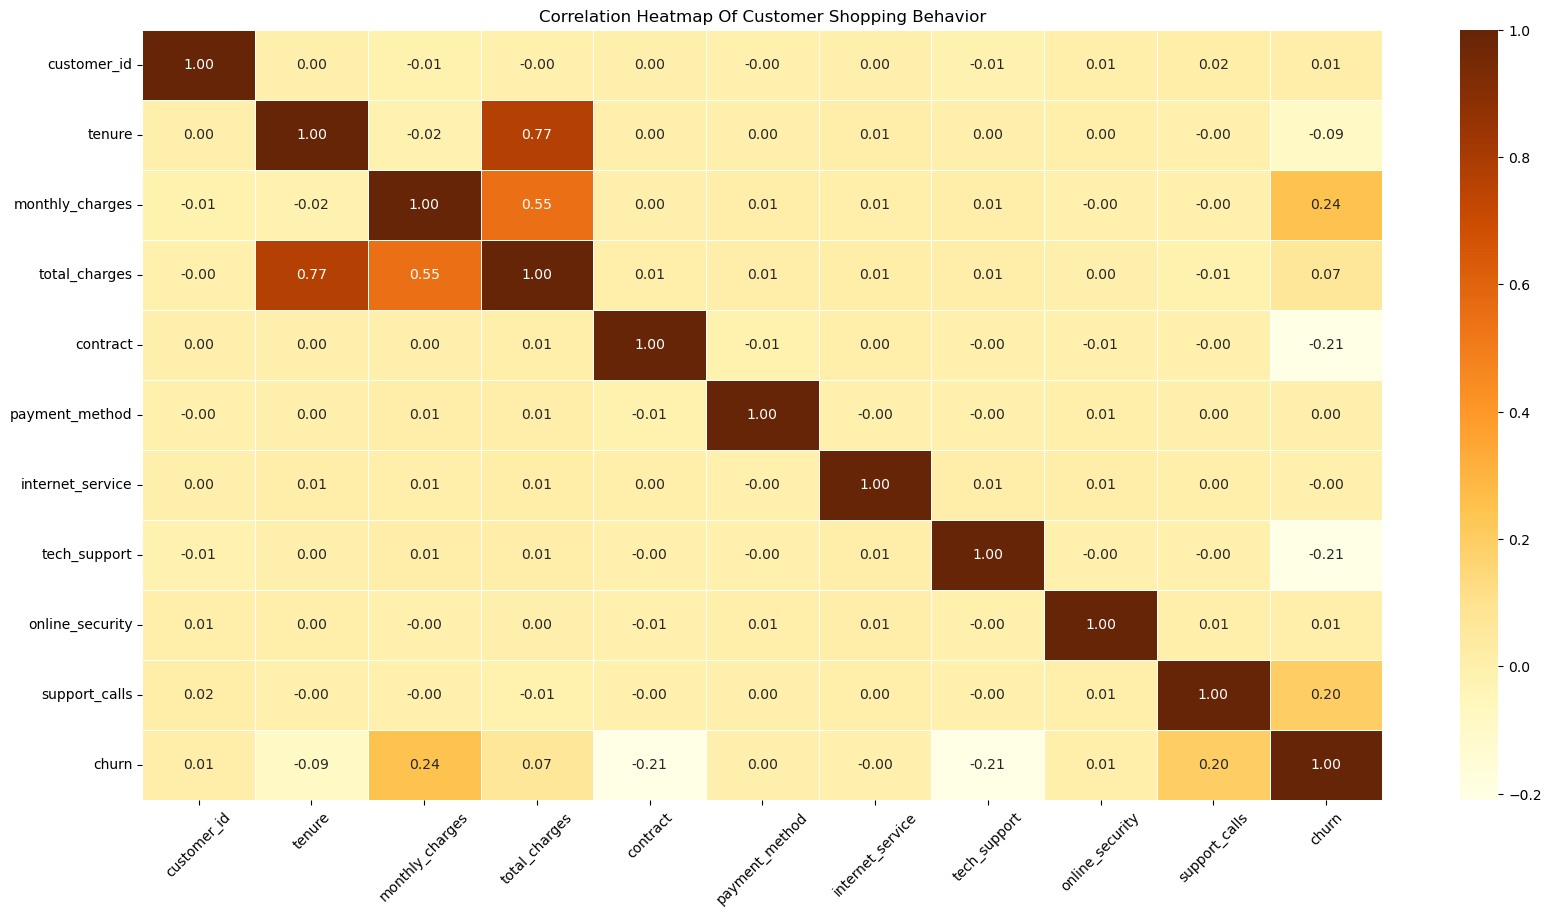

In [42]:
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, cmap='YlOrBr', fmt='.2f', linewidth=0.5)
plt.title('Correlation Heatmap Of Customer Shopping Behavior')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Predictive Modeling

### 1. Train Test Split

In [44]:
df = df.drop(['customer_id'], axis = 1)
df

,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,52,54.20,2818.40,0,0,1,0,1,1,0
1,15,35.28,529.20,0,1,1,0,0,2,0
2,72,78.24,5633.28,0,1,1,0,0,0,0
3,61,80.24,4894.64,1,2,2,1,1,0,0
4,21,39.38,826.98,0,3,2,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...
19995,36,69.51,2502.36,2,2,1,0,1,0,1
19996,10,59.88,598.80,0,3,2,1,0,1,0
19997,6,42.96,257.76,0,0,2,0,0,2,0
19998,7,102.85,719.95,0,1,1,1,0,2,0


In [45]:
features = ['tenure', 'monthly_charges', 'total_charges', 'contract', 'payment_method', 'internet_service', 'tech_support', 'online_security', 'support_calls']

target = 'churn'

X = df[features]
y = df[target]

#### Scale The Inputs Before Training

In [46]:
scaler = StandardScaler()

In [47]:
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[ 0.74771109, -0.54727571,  0.14574348, ..., -0.73130132,
         1.22576609, -0.41494985],
       [-1.03340729, -1.20218454, -1.07003892, ..., -0.73130132,
        -0.81581634,  0.39462941],
       [ 1.71047778,  0.28486004,  1.64071183, ..., -0.73130132,
        -0.81581634, -1.22452912],
       ...,
       [-1.4666523 , -0.93634417, -1.21419932, ..., -0.73130132,
        -0.81581634,  0.39462941],
       [-1.41851397,  1.13672613, -0.96873257, ...,  1.36742539,
        -0.81581634,  0.39462941],
       [-0.26319394, -0.87126866, -0.61285121, ...,  1.36742539,
        -0.81581634, -0.41494985]])

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(16000, 9) (4000, 9)


### 2. Models

In [49]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decison Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

In [50]:
best_model = None
best_accuracy = 0
best_model_name = ''

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\n {name} Accuracy: {accuracy}')


 Logistic Regression Accuracy: 0.78125

 Decison Tree Accuracy: 0.7405

 Random Forest Accuracy: 0.84725

 Gradient Boosting Accuracy: 0.854

 K-Nearest Neighbors Accuracy: 0.7985

 Support Vector Machine Accuracy: 0.82675


#### Best Model

In [51]:
if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_model = model
    best_model_name = name
    print(f'\n Best Model: {best_model_name} with Accuracy: {best_accuracy}')


 Best Model: Support Vector Machine with Accuracy: 0.82675


### 3. Classification Report

In [52]:
y_pred_best = best_model.predict(X_test)
print(f'\n Classification Report: \n', classification_report(y_test, y_pred_best))


 Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.94      0.88      2645
           1       0.84      0.60      0.70      1355

    accuracy                           0.83      4000
   macro avg       0.83      0.77      0.79      4000
weighted avg       0.83      0.83      0.82      4000



### 4. Confusion Matrix

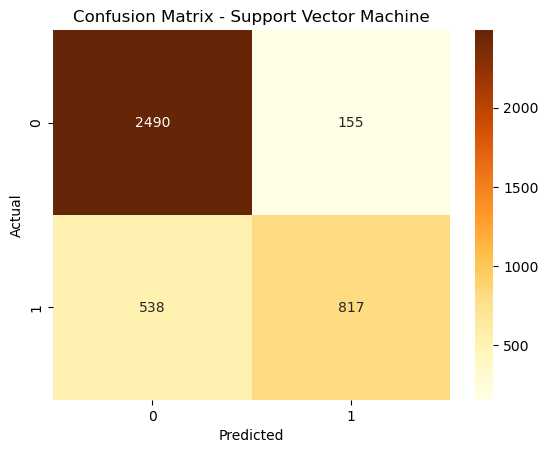

In [53]:
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrBr')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()